# 5.1- NLP

NLP trata de aplicaciones que entiendan nuestro idioma, reconocimiento de voz, traducción, comprensión semántica, análisis de sentimiento..

**Usos**

+ Motores de búsqueda
+ Feed de redes sociales
+ Asistentes de voz 
+ Filtros de span
+ Chatbots
+ IVR

**Librerías**

+ NLTK
+ Spacy
+ TFIDF
+ OpenNLP
+ HuggingFace
+ Twilio

La dificultad del NLP está en varios niveles:

+ Ambigüedad:

  * Nivel léxico: por ejemplo, varios significados
  * Nivel referencial: anáforas, metáforas, etc...
  * Nivel estructural: la semántica es necesaria para entender la estructura de una oración
  * Nivel pragmático: dobles sentidos, ironía, humor
  
+ Detección de espacios
+ Recepción imperfecta: acentos, -ismos, OCR

El proceso es similar que en USL, primero se vectorizan las palabras y después se miden sus distancias/similitudes. 

In [1]:
# lista de 100 peliculas

titles=open('../data/title_list.txt').read().split('\n')[:100]

titles[:10]

['The Godfather',
 'The Shawshank Redemption',
 "Schindler's List",
 'Raging Bull',
 'Casablanca',
 "One Flew Over the Cuckoo's Nest",
 'Gone with the Wind',
 'Citizen Kane',
 'The Wizard of Oz',
 'Titanic']

In [2]:
synopsis=open('../data/synopses_list.txt').read().split('\n BREAKS HERE')[:100]

synopsis[0][:100]

" Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter's wedding, Vito Corleone h"

In [24]:
len(synopsis)

100

### Limpieza

In [3]:
#%pip install spacy
#%pip install nltk

In [4]:
import string

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


from nltk import word_tokenize

import re

[nltk_data] Downloading package stopwords to /Users/iudh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#%python -m spacy download en_core_web_sm

#%pip install spacy-lookups-data

In [6]:
nlp=spacy.load('en_core_web_sm')   # modelo preentrenado, ingles

# stopwords
stop_words_en=set(stopwords.words('english') + list(STOP_WORDS) + list(nlp.Defaults.stop_words) + ['edit', 'plot'])

stop_words=stop_words_en 

In [7]:
def spacy_tokenizer(frase):
    
    tokens=word_tokenize(frase)  # lista de palabras
    
    filtrado=[]
    
    for palabra in tokens:
        
        lemma=nlp(str(palabra))[0].lemma_.lower().strip()
        
        if lemma not in stop_words and re.search('^[a-zA-Z]+$', lemma):
            filtrado.append(lemma)
            
    return filtrado

In [8]:
synopsis[0][:400]

" Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito's youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito's godson Johnny Fontane, a popular singer, pleads for help in securing a covet"

In [9]:
spacy_tokenizer(synopsis[0][:200])

['day',
 'daughter',
 'wedding',
 'vito',
 'corleone',
 'hear',
 'request',
 'role',
 'godfather',
 'new',
 'york',
 'crime',
 'family',
 'vito',
 'young',
 'son']

### TFIDF (term frequency inverse document frequency)

In [10]:
type(synopsis[0])

str

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf=TfidfVectorizer(min_df=0.15, tokenizer=spacy_tokenizer)

In [13]:
%%time

tfidf_matrix=tfidf.fit_transform(synopsis)

CPU times: user 7min 44s, sys: 732 ms, total: 7min 45s
Wall time: 7min 45s


In [14]:
tfidf_matrix.shape, len(synopsis)

((100, 279), 100)

In [15]:
(str(tfidf_matrix[0]).split('\n'))[:10]

['  (0, 264)\t0.05195778473541241',
 '  (0, 124)\t0.0683021208034531',
 '  (0, 54)\t0.06455276766523606',
 '  (0, 53)\t0.0657425073188974',
 '  (0, 195)\t0.14229338623802046',
 '  (0, 245)\t0.033529967786142756',
 '  (0, 2)\t0.06699030554572089',
 '  (0, 233)\t0.0657425073188974',
 '  (0, 221)\t0.10251412342157659',
 '  (0, 263)\t0.07114669311901023']

In [16]:
import pandas as pd

df=pd.DataFrame(tfidf_matrix)

In [17]:
df.head()

,0
0,"(0, 264)\t0.05195778473541241\n (0, 124)\t0..."
1,"(0, 3)\t0.07398606760004768\n (0, 14)\t0.07..."
2,"(0, 95)\t0.07268504463149769\n (0, 187)\t0...."
3,"(0, 156)\t0.07117919158660735\n (0, 134)\t0..."
4,"(0, 246)\t0.07007639574163582\n (0, 102)\t0..."


In [18]:
terms=tfidf.get_feature_names_out()

terms[:15]

array(['able', 'accept', 'act', 'admit', 'affair', 'agree', 'allow',
       'american', 'apartment', 'appear', 'approach', 'arm', 'army',
       'arrange', 'arrest'], dtype=object)

In [32]:
len(terms)

279

In [33]:
tfidf_df=pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

tfidf_df.head()

,able,accept,act,admit,affair,agree,allow,american,apartment,appear,...,win,window,witness,woman,work,world,wound,year,york,young
0,0.0,0.186982,0.06699,0.000000,0.000000,0.046826,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.093651,0.131485,0.046826
1,0.0,0.000000,0.00000,0.073986,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.098988,0.058507,0.0,0.095312,0.000000,0.000000
2,0.0,0.000000,0.00000,0.000000,0.000000,0.050806,0.122868,0.000000,0.0,0.0,...,0.074108,0.0,0.067626,0.055614,0.000000,0.155936,0.0,0.000000,0.000000,0.000000
3,0.0,0.000000,0.00000,0.000000,0.140051,0.000000,0.000000,0.094990,0.0,0.0,...,0.131584,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.045105,0.189979,0.000000
4,0.0,0.000000,0.00000,0.000000,0.000000,0.054435,0.065822,0.076426,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.056535,0.000000,0.0,0.000000,0.000000,0.000000


In [34]:
tfidf_df.shape

(100, 279)

### Distancias

In [20]:
from sklearn.metrics.pairwise import cosine_similarity as cos

In [21]:
distancias=1-cos(tfidf_matrix)

distancias.shape

(100, 100)

In [22]:
pd.DataFrame(distancias).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-2.220446e-16,0.782325,8.613287e-01,0.728574,7.920806e-01,0.890847,0.686216,0.807017,0.787658,0.892113,...,0.711455,0.854941,0.793626,0.839070,0.738379,0.704077,0.840584,0.760392,0.819074,0.836106
1,7.823252e-01,0.000000,7.356491e-01,0.856228,7.398684e-01,0.773820,0.757898,0.741708,0.755691,0.880094,...,0.736923,0.823799,0.815867,0.861396,0.784921,0.896793,0.873847,0.725600,0.809578,0.881673
2,8.613287e-01,0.735649,-2.220446e-16,0.798006,7.681819e-01,0.794821,0.709619,0.744165,0.801774,0.822027,...,0.837733,0.837956,0.697371,0.797606,0.823124,0.905449,0.857548,0.785374,0.802764,0.856607
3,7.285736e-01,0.856228,7.980060e-01,0.000000,7.984989e-01,0.799007,0.751026,0.667497,0.838479,0.820019,...,0.823748,0.838125,0.759854,0.747629,0.710820,0.818018,0.800954,0.788693,0.807612,0.834004
4,7.920806e-01,0.739868,7.681819e-01,0.798499,-2.220446e-16,0.710904,0.698729,0.798067,0.705634,0.773711,...,0.676539,0.764317,0.737144,0.731261,0.606953,0.706905,0.751714,0.623090,0.637548,0.748952


### Clustering

In [23]:
import warnings
warnings.simplefilter('ignore')

import pylab as plt
from IPython.display import set_matplotlib_formats

%matplotlib inline
set_matplotlib_formats('svg')

import numpy as np

In [35]:
from umap import UMAP

In [36]:
umap=UMAP(n_neighbors=5, random_state=42)

emb=umap.fit_transform(distancias)

In [37]:
emb[:5]

array([[ 2.4098988 ,  6.1998725 ],
       [ 2.3289557 ,  7.886638  ],
       [ 3.086704  , 10.655934  ],
       [ 0.37474775,  5.308444  ],
       [ 1.0913645 ,  8.477825  ]], dtype=float32)

In [38]:
emb.shape

(100, 2)

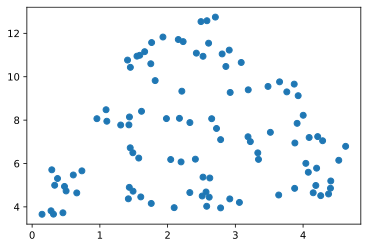

In [39]:
plt.scatter(emb[:, 0], emb[:, 1]);

In [40]:
# DBSCAN

from sklearn.cluster import DBSCAN

In [41]:
dbscan=DBSCAN(eps=0.8, min_samples=7)

In [42]:
dbscan.fit(emb)

DBSCAN(eps=0.8, min_samples=7)

In [43]:
dbscan.labels_

array([-1,  1,  3,  0,  1,  2,  2,  0,  2,  1,  3, -1, -1,  2,  1,  1,  2,
       -1,  1,  3,  2,  1,  1,  1,  3,  0, -1,  1,  1,  3,  1,  3,  0,  3,
        3,  0,  3,  4,  3,  0,  2, -1, -1,  2,  2,  2,  2,  2,  3,  4,  3,
        2,  4,  4, -1,  3,  4,  3,  3, -1,  2,  3,  3,  1,  1, -1,  1, -1,
        2,  1,  1,  2,  2,  2,  2,  2,  1,  2,  2,  4,  2, -1,  0,  2,  2,
        2, -1, -1,  3, -1,  1,  2,  4,  2,  1,  1, -1,  1,  1,  0])

In [44]:
# HDBSCAN

from hdbscan import HDBSCAN

In [45]:
hdbscan=HDBSCAN(min_cluster_size=5)

clusters=hdbscan.fit_predict(emb)

In [46]:
np.unique(clusters)

array([-1,  0,  1,  2])

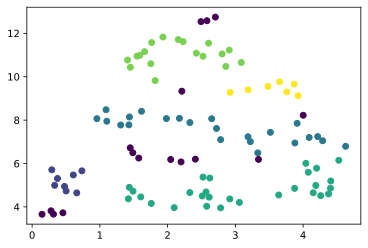

In [48]:
plt.scatter(emb[:, 0], emb[:, 1], c=dbscan.fit_predict(emb));

### titulos de los clusters

In [51]:
def get_titles_from_cluster(c):
    return pd.Series(titles)[clusters==c]

In [70]:
get_titles_from_cluster(0)

2                                      Schindler's List
10                                   Lawrence of Arabia
19                                            Star Wars
24                         The Bridge on the River Kwai
29    Dr. Strangelove or: How I Learned to Stop Worr...
31                                       Apocalypse Now
33        The Lord of the Rings: The Return of the King
34                                            Gladiator
36                                  Saving Private Ryan
38                              Raiders of the Lost Ark
48                                               Patton
50                                           Braveheart
55                                              Platoon
57                                   Dances with Wolves
58                                          The Pianist
62                       All Quiet on the Western Front
87                                    The African Queen
88                                           Sta

In [61]:
def get_df_from_cluster(c):
    return tfidf_df[clusters==c]

In [63]:
get_df_from_cluster(2).describe()

,able,accept,act,admit,affair,agree,allow,american,apartment,appear,...,win,window,witness,woman,work,world,wound,year,york,young
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.015231,0.024217,0.017775,0.016788,0.031895,0.032628,0.017460,0.018056,0.041501,0.023366,...,0.020935,0.026072,0.022279,0.048981,0.042914,0.026409,0.011404,0.048298,0.038838,0.031516
std,0.033947,0.047450,0.052779,0.037398,0.080533,0.043289,0.035438,0.045590,0.116604,0.053917,...,0.051593,0.074530,0.056280,0.079498,0.053159,0.051606,0.035707,0.061216,0.079858,0.039463
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032124,0.000000,0.000000
75%,0.000000,0.008035,0.000000,0.000000,0.000000,0.055908,0.000000,0.000000,0.000000,0.007510,...,0.000000,0.000000,0.000000,0.064026,0.074435,0.010959,0.000000,0.076403,0.000000,0.051129
max,0.115804,0.186982,0.374399,0.181054,0.399303,0.171644,0.168355,0.236528,0.624318,0.310452,...,0.222347,0.443047,0.287188,0.333065,0.233289,0.196874,0.247693,0.239614,0.337984,0.139231


In [64]:
get_df_from_cluster(2).describe().T

,count,mean,std,min,25%,50%,75%,max
able,68.0,0.015231,0.033947,0.0,0.0,0.000000,0.000000,0.115804
accept,68.0,0.024217,0.047450,0.0,0.0,0.000000,0.008035,0.186982
act,68.0,0.017775,0.052779,0.0,0.0,0.000000,0.000000,0.374399
admit,68.0,0.016788,0.037398,0.0,0.0,0.000000,0.000000,0.181054
affair,68.0,0.031895,0.080533,0.0,0.0,0.000000,0.000000,0.399303
...,...,...,...,...,...,...,...,...
world,68.0,0.026409,0.051606,0.0,0.0,0.000000,0.010959,0.196874
wound,68.0,0.011404,0.035707,0.0,0.0,0.000000,0.000000,0.247693
year,68.0,0.048298,0.061216,0.0,0.0,0.032124,0.076403,0.239614
york,68.0,0.038838,0.079858,0.0,0.0,0.000000,0.000000,0.337984


In [68]:
top_words=get_df_from_cluster(2).T.sum(axis=1).sort_values(ascending=False)

top_words.head()

tell      5.119416
father    4.857467
leave     4.468724
love      4.424926
find      4.371688
dtype: float64

## NLP_es 

In [71]:
#!python -m spacy download es_core_news_md

In [72]:
nlp=spacy.load('es_core_news_md')

In [76]:
nlp('hola me llamo pepito').vector.sum()

-17.019897

In [79]:
(nlp('hola').vector + nlp('me').vector + nlp('llamo').vector + nlp('pepito').vector).sum()/4

-17.0198974609375

##### similitud

In [85]:
nlp('quiero saludar a todos los alumnos de Ironhack, que pasa alegres').similarity(nlp('hola a todos los alumnos'))

0.8309713443074137

In [86]:
token_1=spacy_tokenizer('quiero saludar a todos los alumnos de Ironhack, que pasa alegres')
token_2=spacy_tokenizer('hola a todos los alumnos')

token_1

['querer',
 'saludar',
 'todo',
 'el',
 'alumno',
 'de',
 'ironhack',
 'que',
 'pasar',
 'alegre']

In [87]:
def get_simil(t1, t2):
    return nlp(' '.join(t1)).similarity(nlp(' '.join(t2)))  # similitud es entre -1 y 1, por el valor del coseno

In [88]:
get_simil(token_1, token_2)

0.7221080959132022

# WordClouds

In [ ]:
#!pip install langdetect
#!pip install wordcloud

In [91]:
from PIL import Image

stop_words_sp=set(stopwords.words('spanish') + ['haber'])
stop_words_en=set(stopwords.words('english'))

stop_words= stop_words_sp | stop_words_en

from langdetect import detect

from wordcloud import WordCloud

In [95]:
def tokenizer(frase):
    
    if detect(frase)=='en':  # si esta en ingles...
        nlp=spacy.load('en_core_web_sm')
        
    elif detect(frase)=='es': # si esta en castellano...
        nlp=spacy.load('es_core_news_md')
        
    else:
        return 'No es ni castellano ni ingles..'
    
    
    tokens=word_tokenize(frase)
    
    clean_tokens=[]
    
    for e in tokens:
        
        lema=nlp(str(e))[0].lemma_.lower().strip()
        
        if lema not in stop_words and re.search('^[a-zA-Z]+$', lema):
            
            clean_tokens.append(lema)
            
    return ' '.join(clean_tokens)

In [99]:
def wordcloud(df, col):
    
    w=WordCloud(width=1600, height=400,
                stopwords=stop_words, 
               colormap='Spectral').generate(' '.join([e for e in df[col]]))
    
    plt.figure(figsize=(15, 10), facecolor='k')
    plt.imshow(w)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig('images/wordcloud.png', facecolor='k', bbox_inches='tight')
    plt.show();

In [101]:
%%time

df=pd.DataFrame(synopsis, columns=['text'])

df.text=df.text.apply(tokenizer)

df.head()

CPU times: user 8min 27s, sys: 1.5 s, total: 8min 28s
Wall time: 8min 29s


,text
0,plot edit edit edit day daughter wedding vito ...
1,plot edit edit edit banker andy dufresne convi...
2,plot edit edit edit german move polish jews gh...
3,plot edit edit edit brief scene age overweight...
4,plot edit edit edit early december american ex...


In [102]:
%%time

txt=open('../data/conde.txt').read().split('\n BREAKS HERE')[:100]

df2=pd.DataFrame(txt, columns=['text'])

df2.text=df2.text.apply(tokenizer)

df2.head()

CPU times: user 29.3 s, sys: 131 ms, total: 29.4 s
Wall time: 29.4 s


,text
0,timesnewromanpsmt alejandro conde marsella feb...


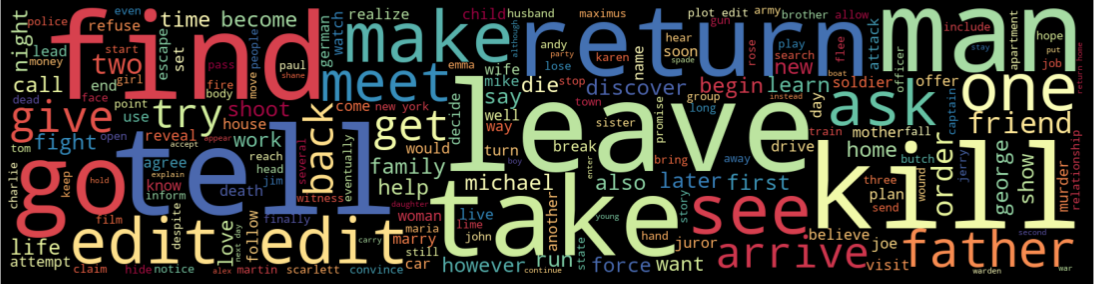

In [103]:
wordcloud(df, 'text')

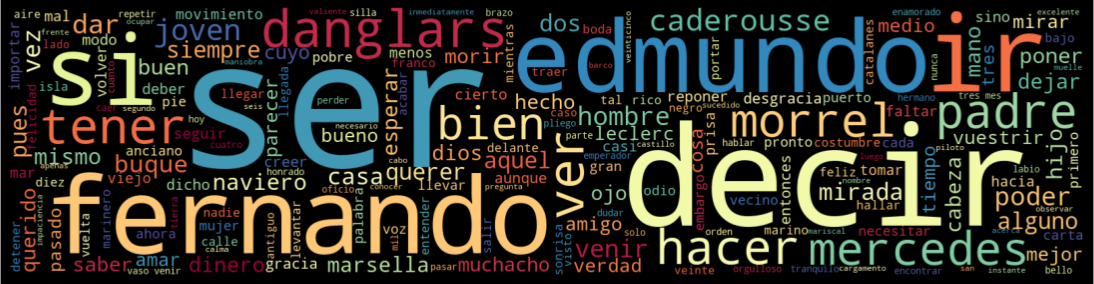

In [104]:
wordcloud(df2, 'text')

#### Mascara

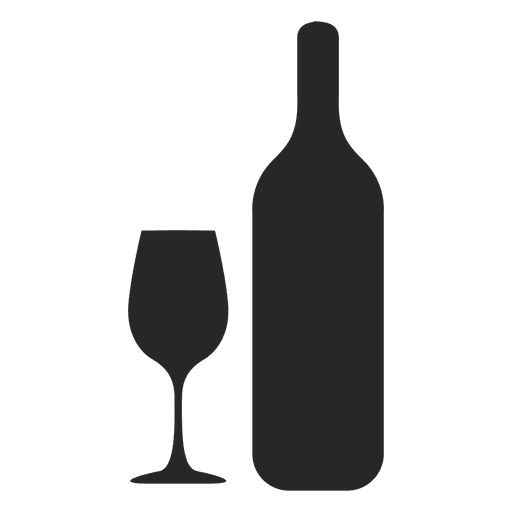

In [105]:
# imagen con mascara

Image.open('images/vino.png')

In [106]:
vino_mask=np.array(Image.open('images/vino.png'))

vino_mask.shape

(512, 512)

In [108]:
# transformacion de la mascara

def transformacion(val):
    if val==0:
        return 255
    else:
        return val

In [109]:
t_vino_mask=np.ndarray((vino_mask.shape[0], vino_mask.shape[1]), np.int32)


for i in range(len(vino_mask)):
    t_vino_mask[i]=list(map(transformacion, vino_mask[i]))

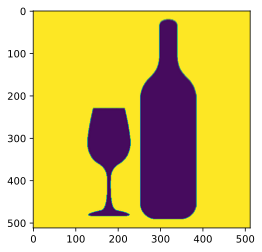

In [113]:
plt.imshow(t_vino_mask);

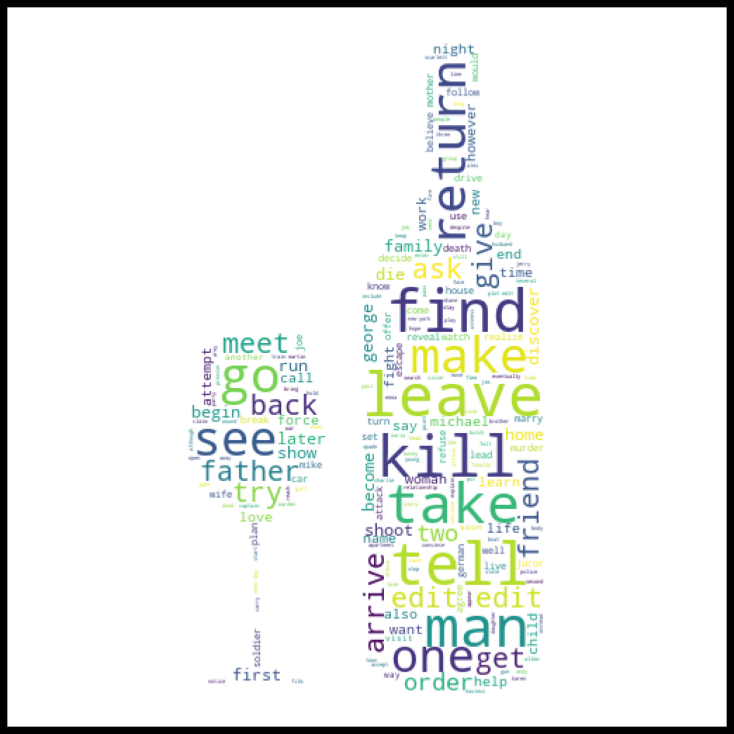

In [115]:
w=WordCloud(background_color='white',
                   max_words=1000,
                   mask=t_vino_mask,
                   stopwords=stop_words,
                   contour_width=0,
                   contour_color='firebrick').generate(' '.join([e for e in df.text]))


w.to_file('images/copa&botella.png')


plt.figure(figsize=(15, 10), facecolor='k')
plt.imshow(w)
plt.axis('off')
plt.tight_layout(pad=0)


## NER

In [116]:
news=pd.read_csv('../data/noticias.csv')

news.head()

,url,authors,title,publish_date,text,top_image,keywords,summary,video,polarity,subjectivity,negativity,neutrality,positivity,compound_score
0,http://epaper.lavanguardia.com/la-vanguardia/l...,[],14 de agosto de 2020,2020-08-14 00:00:00,"Segunda\n\nTodo sobre Kamala Harris En 1970, c...",http://static.milibris.com/thumbnail/issue/9d8...,"[""14"", ""2020"", ""agosto""]",Postal: ciudad zombi La preocupación por la ag...,[],0.031507,0.381115,0.020,0.960,0.021,-0.1048
1,http://epaper.lavanguardia.com/la-vanguardia/l...,[],13 de septiembre de 2020,2020-09-13 00:00:00,Segunda\n\nEl papel no quiere morir Una notici...,http://static.milibris.com/thumbnail/issue/876...,"[""septiembre"", ""2020"", ""13""]",El honor de la familia se ha desplazado del vi...,[],0.090058,0.451170,0.025,0.955,0.020,-0.9705
2,http://epaper.lavanguardia.com/la-vanguardia/l...,[],15 de julio de 2020,2020-07-15 00:00:00,Segunda\n\nPrivacidad en peligro Existe una em...,http://static.milibris.com/thumbnail/issue/cce...,"[""julio"", ""2020"", ""15""]",Los estudiantes internacionales matriculados e...,[],0.076812,0.416667,0.025,0.957,0.018,-0.9798
3,https://club.lavanguardia.com/es/ocio-cultura/...,[],Descuento PortAventura,NaN,Presenta tu tarjeta del Club en taquillas\n\n3...,https://club.lavanguardia.com/sites/default/fi...,"[""world"", ""descuento"", ""portaventura"", ""tarjeta""]",Presenta tu tarjeta del Club en taquillas35% d...,"[""https://www.youtube.com/embed/oqXl8CLaHdY""]",0.100000,0.100000,0.040,0.960,0.000,-0.7783
4,http://epaper.lavanguardia.com/la-vanguardia/l...,[],1 de febrero de 2021,2021-02-01 00:00:00,Portada\n\nSalut defiende prolongar las restri...,http://static.milibris.com/thumbnail/issue/d7c...,"[""febrero"", ""2021""]",Sostiene que el PP genera progreso allí donde ...,[],0.057292,0.425556,0.021,0.957,0.022,-0.5686


In [117]:
import spacy
from spacy import displacy

In [ ]:
#!python -m spacy download es_core_news_lg

In [ ]:
#!python -m spacy download en_core_web_lg

In [118]:
spacy_core_es='es_core_news_md'

spacy_core_en='en_core_web_sm'

In [119]:
def ner(spacy_core, data):
    
    nlp=spacy.load(spacy_core)
    
    frases=list(nlp(data).sents)  # frases, sentencias
    
    entidades=displacy.render(nlp(str(frases)), style='ent')
    
    return entidades

In [120]:
ner(spacy_core_es, news.text[150])

In [121]:
ner(spacy_core_en, synopsis[3][:1000])

### Transformers (creacion de texto)

In [ ]:
#!pip install transformers
#!pip install torch

In [122]:
from transformers import pipeline

generador=pipeline('text-generation', 
                   model='EleutherAI/gpt-neo-125M')

In [123]:
def crea_texto(generador, texto, min_long=20):
    
    return generador(texto, do_sample=True, min_length=min_long)[0]['generated_text']

In [125]:
crea_texto(generador, 'data science is ')

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'data science is \npossible to \ndo as described in the \narticle at the'

In [126]:
crea_texto(generador, 'what planet is this')

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'what planet is this, if not from the stars? Are we really so\nmuch more intelligent than'

In [127]:
crea_texto(generador, 'el monstruo de las galletas')

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'el monstruo de las galletas de San Clemente a las que se ven el h'

In [128]:
crea_texto(generador, 'hola alegre ')

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'hola alegre és (Móra, 1989)\nFernández'

In [129]:
crea_texto(generador, 'molt be noi')

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'molt be noi-molt-wel-waste-emote-re-'

In [130]:
crea_texto(generador, 'rellampagos asgaya')

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'rellampagos asgaya, de tudo en el que la búsqueda lo h'

In [138]:
crea_texto(generador, 'el resplandor esta brillando ')

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'el resplandor esta brillando \ne não é só especific'